In [ ]:
#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [ ]:
#Load and Preview Dataset

In [2]:
df = pd.read_csv('world_tourism_economy_data.csv')

In [4]:
df.head(10)

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
5,Albania,ALB,1999,2.180000e+08,3.710000e+05,55.969191,NaN,3.699007,3.212122e+09,0.389438,18.40
6,Andorra,AND,1999,NaN,9.422000e+06,NaN,NaN,NaN,1.240295e+09,NaN,NaN
7,Arab World,ARB,1999,NaN,NaN,NaN,NaN,NaN,6.654154e+11,2.669374,NaN
8,United Arab Emirates,ARE,1999,8.930000e+08,NaN,NaN,NaN,NaN,8.444547e+10,NaN,NaN
9,Argentina,ARG,1999,3.175000e+09,2.898000e+06,11.340372,NaN,15.889092,2.835230e+11,NaN,14.05


In [ ]:
#Selecting features to use

In [15]:
features = [
    'tourism_receipts',
    'tourism_arrivals',
    'tourism_exports',
    'tourism_expenditures',
    'gdp',
    'inflation',
    'unemployment'
]

In [ ]:
#Cleaning the Dataset

In [16]:
country_col = df['country']

In [17]:
df_features = df[features]

In [18]:
df_clean = df_features.dropna().reset_index(drop=True)

In [19]:
countries = df.loc[df_clean.index, 'country'].reset_index(drop=True)

In [23]:
df_clean = df_clean.copy()
df_clean['country'] = countries

In [24]:
cols = ['country'] + [col for col in df_clean.columns if col != 'country']
df_clean = df_clean[cols]

In [25]:
print("Rows after cleaning:", df_clean.shape[0])

Rows after cleaning: 2264


In [26]:
df_clean.head()

,country,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,2.180000e+08,371000.0,55.969191,3.699007,3.212122e+09,0.389438,18.400
1,Africa Eastern and Southern,4.700000e+07,41000.0,12.182393,5.645567,1.845482e+09,0.648246,11.200
2,Afghanistan,1.140800e+10,4459000.0,15.247228,10.362464,3.896522e+11,1.483129,6.876
3,Africa Western and Central,9.300000e+07,602000.0,7.254171,7.766452,4.581249e+09,-8.525170,16.250
4,Angola,1.184000e+09,5056000.0,20.432201,11.384618,1.362733e+10,2.573043,14.100


In [27]:
numeric_features = df_clean.drop(columns='country')

In [30]:
print("Duplicates:", df_clean.duplicated().sum())

Duplicates: 0


In [33]:
for col in df_clean.columns[1:]:  
    print(f"{col}: {(df_clean[col] <= 0).sum()} values <= 0")

tourism_receipts: 0 values <= 0
tourism_arrivals: 0 values <= 0
tourism_exports: 0 values <= 0
tourism_expenditures: 0 values <= 0
gdp: 0 values <= 0
inflation: 151 values <= 0
unemployment: 0 values <= 0


In [ ]:
#Boxplots

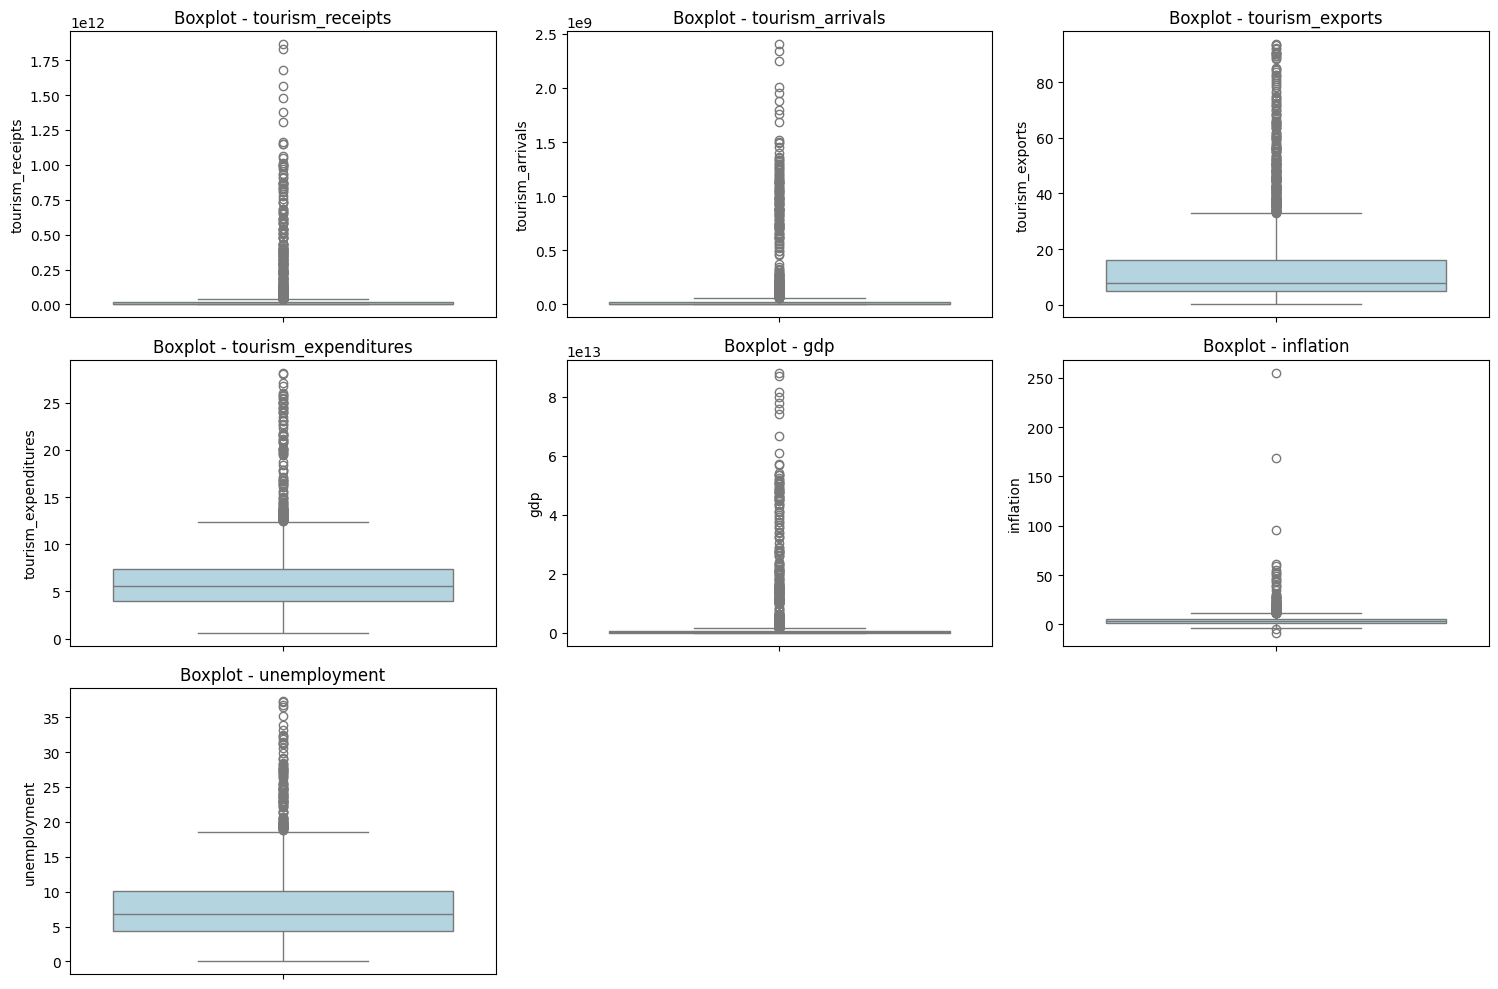

In [38]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_clean.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_clean[col], color='lightblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [ ]:
#Correlation heatmap

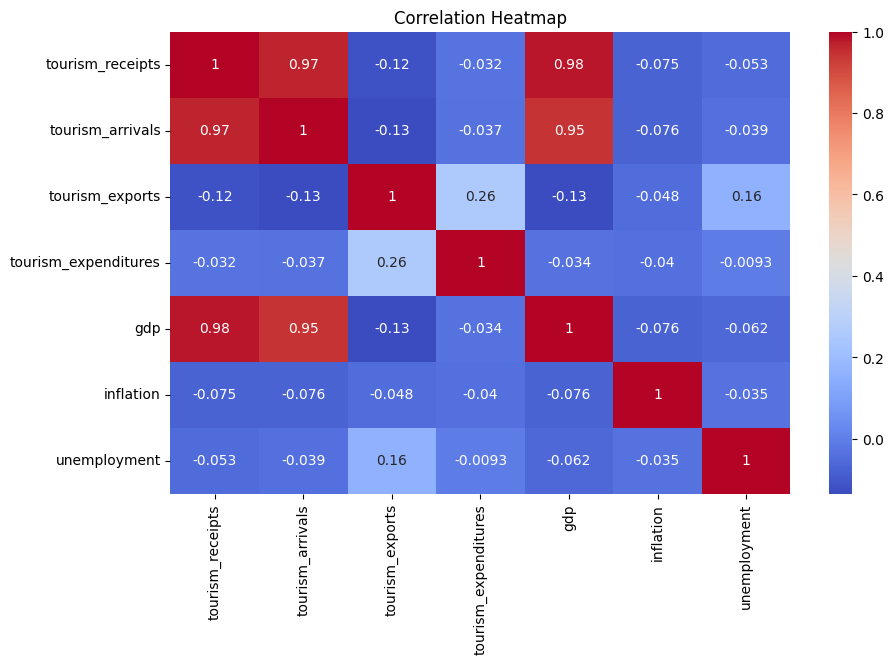

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.drop(columns='country').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
numeric_features = df_clean.drop(columns='country')

In [41]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

In [42]:
tourism_cluster_data = pd.DataFrame(scaled_data, columns=numeric_features.columns)
tourism_cluster_data.insert(0, 'country', df_clean['country'])

In [43]:
tourism_cluster_data.head(10)

,country,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,-0.292576,-0.320361,2.683975,-0.686568,-0.292353,-0.491291,1.891700
1,Africa Eastern and Southern,-0.293634,-0.321690,-0.106604,-0.173350,-0.292504,-0.461038,0.577678
2,Afghanistan,-0.223347,-0.303905,0.088721,1.070278,-0.249832,-0.363445,-0.211465
3,Africa Western and Central,-0.293350,-0.319431,-0.420685,0.385830,-0.292203,-1.533356,1.499318
4,Angola,-0.286600,-0.301502,0.419165,1.339773,-0.291207,-0.236041,1.106936
5,Albania,-0.284039,-0.307170,3.730673,1.468736,-0.291861,-0.390200,-0.106709
6,Andorra,-0.293158,-0.320478,-0.280021,-0.110687,-0.291795,-0.284379,-0.749119
7,Arab World,-0.283296,-0.301296,-0.682083,-0.210005,-0.226726,0.031110,0.563990
8,United Arab Emirates,-0.289384,-0.318042,2.820286,0.911275,-0.292382,-0.354452,0.470001
9,Argentina,-0.219536,-0.124383,-0.612460,-0.237608,-0.218059,-0.334021,-0.082436


In [ ]:
#Modeling (Clustering)

In [44]:
X = tourism_cluster_data.drop(columns='country')

In [45]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

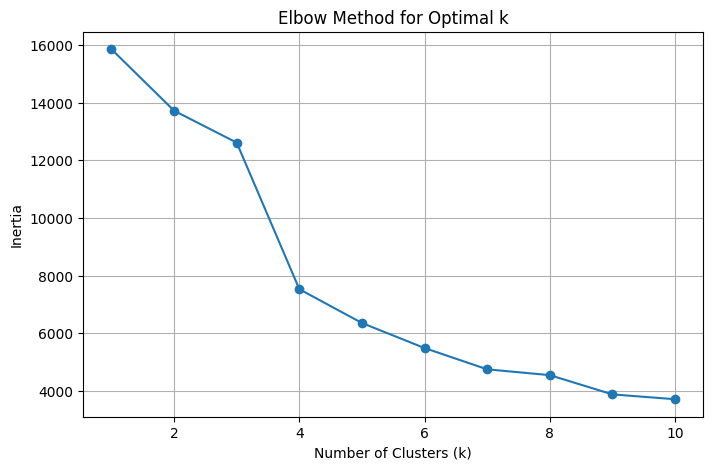

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [47]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

In [48]:
tourism_cluster_data['cluster'] = clusters

In [50]:
tourism_cluster_data.head(10)

,country,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment,cluster
0,Aruba,-0.292576,-0.320361,2.683975,-0.686568,-0.292353,-0.491291,1.891700,2
1,Africa Eastern and Southern,-0.293634,-0.321690,-0.106604,-0.173350,-0.292504,-0.461038,0.577678,0
2,Afghanistan,-0.223347,-0.303905,0.088721,1.070278,-0.249832,-0.363445,-0.211465,0
3,Africa Western and Central,-0.293350,-0.319431,-0.420685,0.385830,-0.292203,-1.533356,1.499318,1
4,Angola,-0.286600,-0.301502,0.419165,1.339773,-0.291207,-0.236041,1.106936,1
5,Albania,-0.284039,-0.307170,3.730673,1.468736,-0.291861,-0.390200,-0.106709,2
6,Andorra,-0.293158,-0.320478,-0.280021,-0.110687,-0.291795,-0.284379,-0.749119,0
7,Arab World,-0.283296,-0.301296,-0.682083,-0.210005,-0.226726,0.031110,0.563990,0
8,United Arab Emirates,-0.289384,-0.318042,2.820286,0.911275,-0.292382,-0.354452,0.470001,2
9,Argentina,-0.219536,-0.124383,-0.612460,-0.237608,-0.218059,-0.334021,-0.082436,0


In [ ]:
#Analysis

In [51]:
cluster_summary = tourism_cluster_data.groupby('cluster').mean(numeric_only=True)
cluster_summary

,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
cluster,,,,,,,
0,-0.155356,-0.159297,-0.329578,-0.096800,-0.152831,0.041105,-0.355277
1,-0.269191,-0.280956,0.080225,-0.263529,-0.281846,-0.056974,1.997390
2,-0.268446,-0.293916,2.304334,0.961608,-0.290401,-0.100311,0.313030
3,4.069640,4.234024,-0.486628,-0.089716,4.117136,-0.289793,-0.174839


In [52]:
for i in range(4): 
    countries = tourism_cluster_data[tourism_cluster_data['cluster'] == i]['country'].tolist()
    print(f"\nCluster {i} countries ({len(countries)}):")
    print(countries[:10], '...' if len(countries) > 10 else '') 



Cluster 0 countries (1655):
['Africa Eastern and Southern', 'Afghanistan', 'Andorra', 'Arab World', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Azerbaijan', 'Burundi'] ...

Cluster 1 countries (264):
['Africa Western and Central', 'Angola', 'Australia', 'Central Europe and the Baltics', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Costa Rica', 'Eritrea', 'Spain'] ...

Cluster 2 countries (248):
['Aruba', 'Albania', 'United Arab Emirates', 'Austria', 'Bahamas, The', 'Belarus', 'Brazil', 'Central African Republic', 'Finland', 'Fiji'] ...

Cluster 3 countries (97):
['Belize', 'Germany', 'Early-demographic dividend', 'European Union', 'Hungary', 'Lebanon', 'Sri Lanka', 'Madagascar', 'OECD members', 'Somalia'] ...


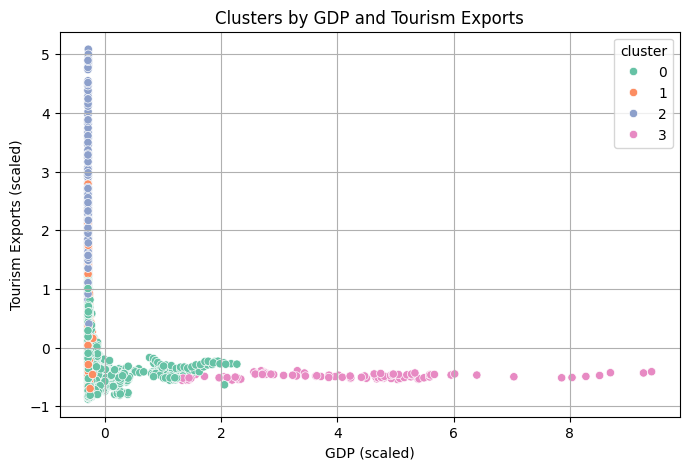

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tourism_cluster_data, x='gdp', y='tourism_exports', hue='cluster', palette='Set2')
plt.title('Clusters by GDP and Tourism Exports')
plt.xlabel('GDP (scaled)')
plt.ylabel('Tourism Exports (scaled)')
plt.grid(True)
plt.show()
